# No More Alzheimer's Disease

## General Data Processing

### Data Downloading

In [3]:
import sys
fields_to_drop = ['RID', 'VISCODE']

### SVM Approach

Use Cross Validation to find what parameters suit this problem the best

In [4]:
%reload_ext autoreload
%autoreload 2
sys.path.append("../../../../..")
from Classifiers.MySVM import MySVM

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV 1/3] END C=0.01, coef0=0.5, decision_function_shape=ovo, degree=4, kernel=poly, shrinking=True;, score=0.529 total time=   0.0s
[CV 2/3] END C=0.01, coef0=0.5, decision_function_shape=ovo, degree=4, kernel=poly, shrinking=True;, score=0.513 total time=   0.0s
[CV 3/3] END C=0.01, coef0=0.5, decision_function_shape=ovo, degree=4, kernel=poly, shrinking=True;, score=0.521 total time=   0.0s
[CV 1/3] END C=0.001, coef0=0.5, decision_function_shape=ovr, degree=2, kernel=rbf, shrinking=False;, score=0.370 total time=   0.0s
[CV 2/3] END C=0.001, coef0=0.5, decision_function_shape=ovr, degree=2, kernel=rbf, shrinking=False;, score=0.370 total time=   0.0s
[CV 3/3] END C=0.001, coef0=0.5, decision_function_shape=ovr, degree=2, kernel=rbf, shrinking=False;, score=0.361 total time=   0.0s
[CV 1/3] END C=10, coef0=0.1, decision_function_shape=ovo, degree=4, kernel=linear, shrinking=True;, score=0.681 total time=   0.0s
[CV 2/3] E

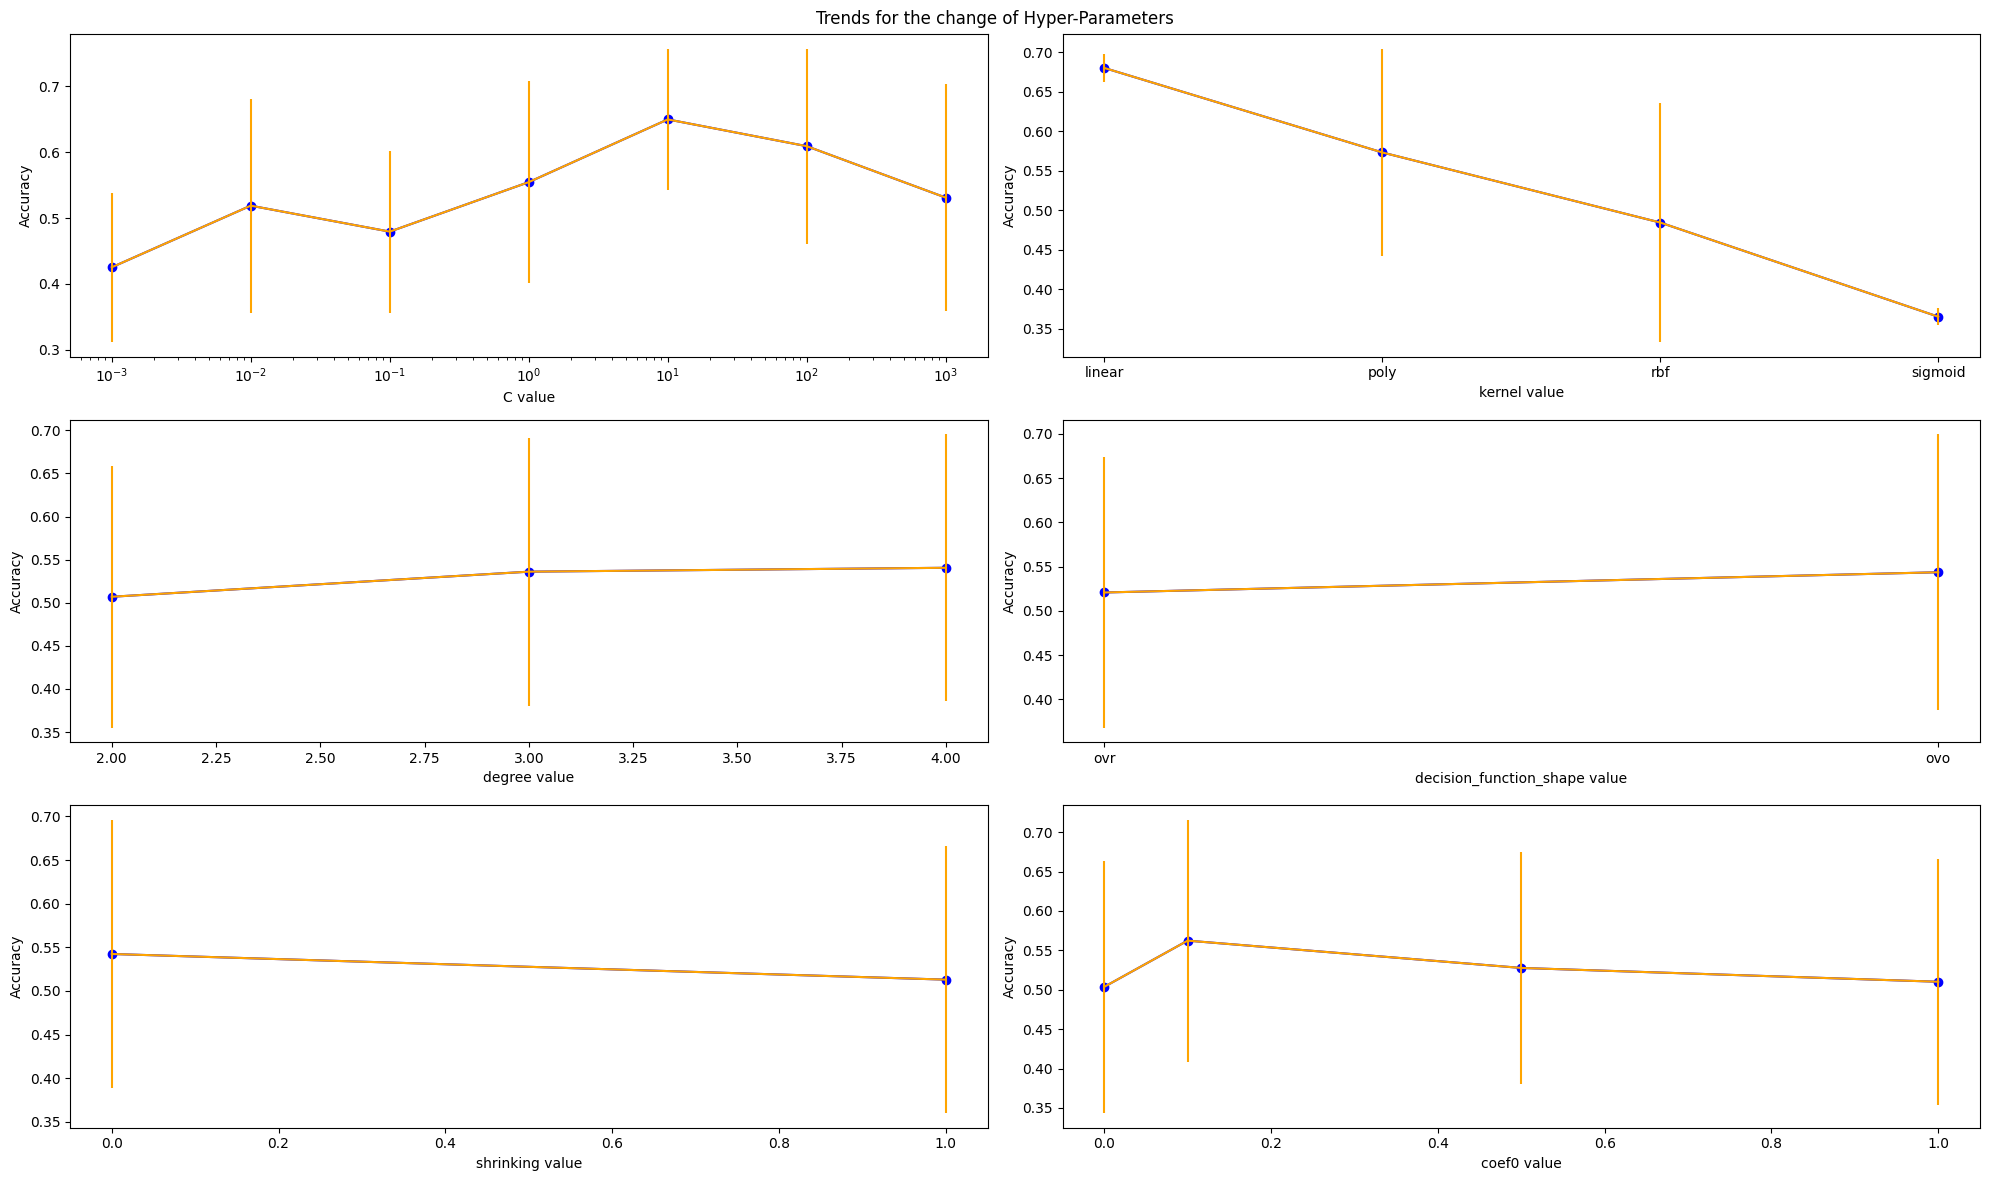

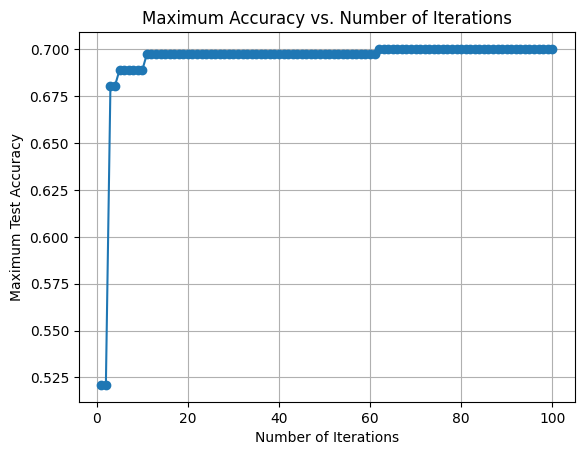

In [9]:
svm = MySVM("data.csv", fields_to_drop)
svm.hyper_parameter_selection(verbose=1, iterations=100)

## Test for these hyper-parameters

In [44]:
svm.test(True)

['AD' 'MCI' 'SCD']
Accuracy is 0.64
+-----------+----------+----------+----------+
|           |      SCD |      MCI |       AD |
+===========+==========+==========+==========+
| Recall    | 0.771429 | 0.625    | 0.516129 |
+-----------+----------+----------+----------+
| Precision | 0.84375  | 0.394737 | 0.8      |
+-----------+----------+----------+----------+
| F1 Score  | 0.80597  | 0.483871 | 0.627451 |
+-----------+----------+----------+----------+
| AUC       | 0.866    | 0.587    | 0.856    |
+-----------+----------+----------+----------+
[[16 15  0]
 [ 4 15  5]
 [ 0  8 27]]


# Random Forest Approach

In [45]:
%reload_ext autoreload
%autoreload 2
from Classifiers.MyRF import MyRF

Computing Results.......
Fitting 3 folds for each of 200 candidates, totalling 600 fits
Best Parameters:  {'n_estimators': 50, 'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 20, 'criterion': 'gini', 'class_weight': 'balanced', 'bootstrap': True}
Best Score:  0.7254901960784315


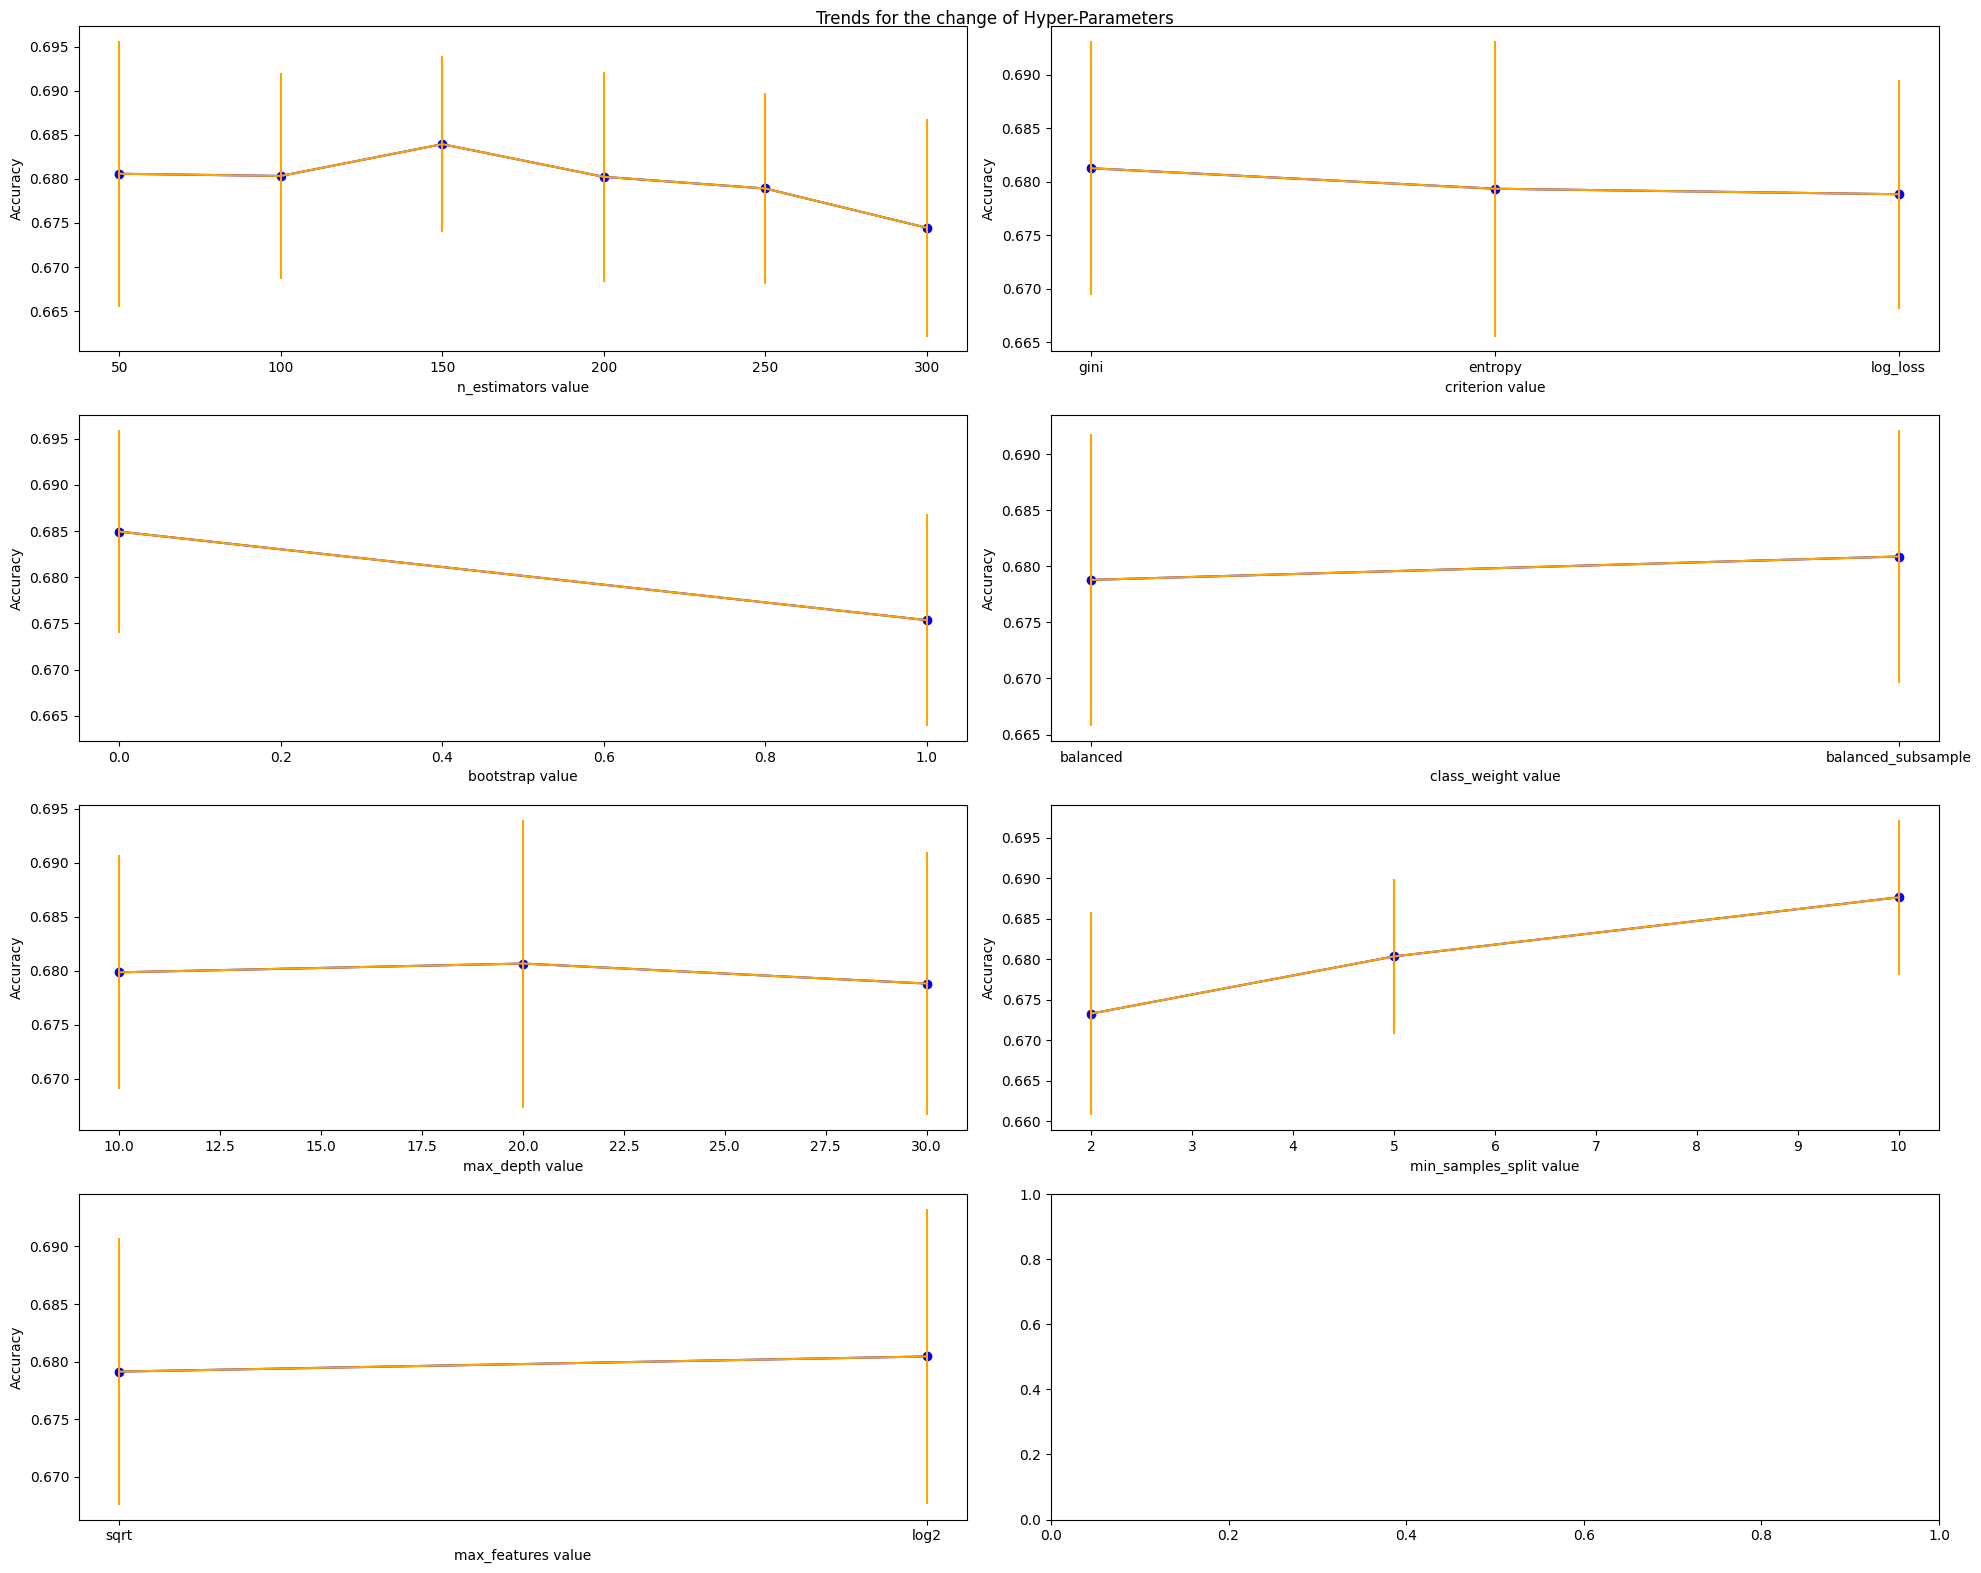

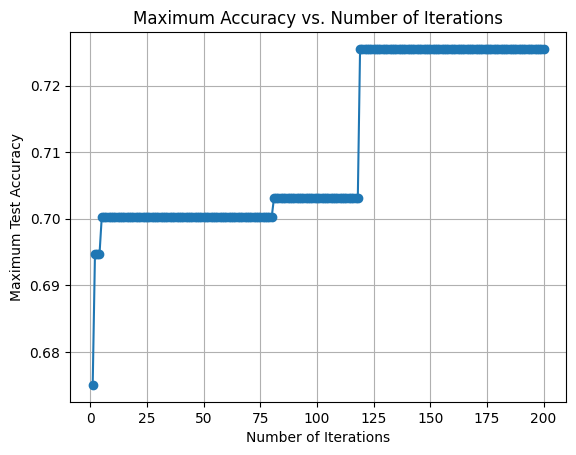

In [46]:
# Before Removing Outliers
print("Computing Results.......")
rf = MyRF("data.csv", fields_to_drop)
rf.hyper_parameter_selection(iterations=200, verbose=1)

In [52]:
# Display the test results for this data
rf.test(True)

AUC: [0.88354292 0.65751263 0.94909091]
Accuracy is 0.61
+-----------+----------+----------+----------+
|           |      SCD |      MCI |       AD |
+===========+==========+==========+==========+
| Recall    | 0.771429 | 0.458333 | 0.548387 |
+-----------+----------+----------+----------+
| Precision | 0.84375  | 0.333333 | 0.68     |
+-----------+----------+----------+----------+
| F1 Score  | 0.80597  | 0.385965 | 0.607143 |
+-----------+----------+----------+----------+
| AUC       | 0.949091 | 0.657513 | 0.883543 |
+-----------+----------+----------+----------+
[[17 14  0]
 [ 8 11  5]
 [ 0  8 27]]


## SMOTE Oversampling

In [55]:
rf.train_test_SMOTE()

AUC: [0.89912521 0.66508838 0.94      ]
Accuracy is 0.63
+-----------+----------+----------+----------+
|           |      SCD |      MCI |       AD |
+===========+==========+==========+==========+
| Recall    | 0.771429 | 0.5      | 0.580645 |
+-----------+----------+----------+----------+
| Precision | 0.84375  | 0.363636 | 0.72     |
+-----------+----------+----------+----------+
| F1 Score  | 0.80597  | 0.421053 | 0.642857 |
+-----------+----------+----------+----------+
| AUC       | 0.94     | 0.665088 | 0.899125 |
+-----------+----------+----------+----------+
[[18 13  0]
 [ 7 12  5]
 [ 0  8 27]]


## Relative Feature Importances

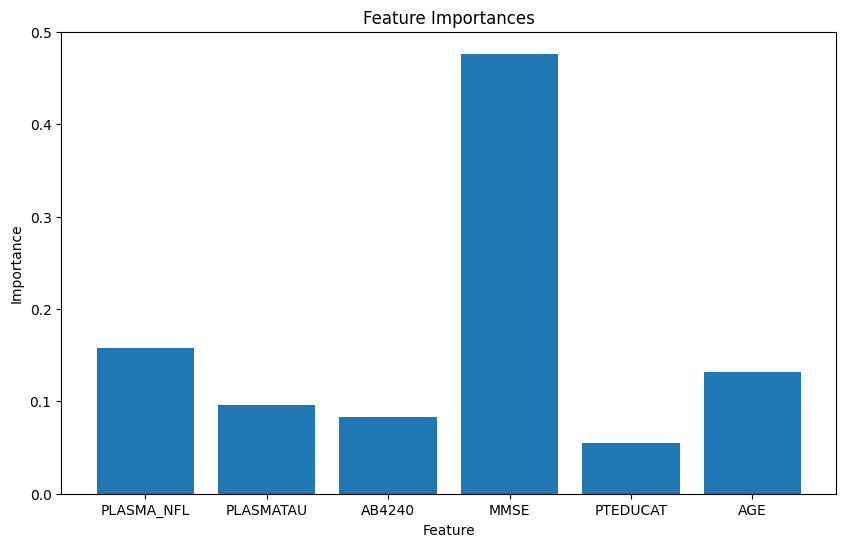

In [53]:
# Get the importance of each feature in this classifier
rf.relative_importance()